In [551]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('Train_BigMart.csv')
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [552]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [553]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [554]:
dataset.loc[dataset['Item_Fat_Content'] == 'Low Fat','Item_Fat_Content'] = 'LowFat'
dataset.loc[dataset['Item_Fat_Content'] == 'low fat','Item_Fat_Content'] = 'LowFat'
dataset.loc[dataset['Item_Fat_Content'] == 'LF','Item_Fat_Content'] = 'LowFat'
dataset.loc[dataset['Item_Fat_Content'] == 'Regular','Item_Fat_Content'] = 'REGULAR'
dataset.loc[dataset['Item_Fat_Content'] == 'reg','Item_Fat_Content'] = 'REGULAR'

In [555]:
dataset['Items_Sold'] = dataset['Item_Outlet_Sales']/dataset['Item_MRP']
dataset['Items_Sold'] = dataset['Items_Sold'].astype(int)

In [556]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Items_Sold
0,FDA15,9.30,LowFat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,REGULAR,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,LowFat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,REGULAR,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,4
4,NCD19,8.93,LowFat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


In [557]:
dataset['Item_Occupancy'] = dataset['Item_Visibility'] * dataset['Items_Sold']

In [558]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Items_Sold,Item_Occupancy
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,14.931714,0.911076
std,4.643456,0.051598,62.275067,8.371760,1706.499616,9.211868,0.946889
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,8.000000,0.237514
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,14.000000,0.612394
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,21.000000,1.276407
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,56.000000,7.901010


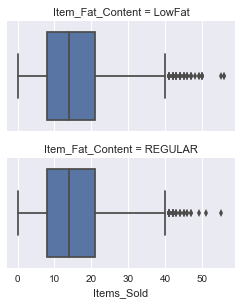

In [559]:
g = sns.FacetGrid(dataset,row='Item_Fat_Content',size=2.2,aspect=1.6)
g.map(sns.boxplot,'Items_Sold')
plt.show()

In [560]:
#dataset['Item_Visibility'] = (dataset['Item_Visibility'] - dataset['Item_Visibility'].min())/  \
#                             (dataset['Item_Visibility'].max() - dataset['Item_Visibility'].min())

In [561]:
dataset['Visibility_Percent'] = dataset['Item_Visibility'] * 100

In [562]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Items_Sold,Item_Occupancy,Visibility_Percent
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,14.931714,0.911076,6.613203
std,4.643456,0.051598,62.275067,8.371760,1706.499616,9.211868,0.946889,5.159782
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000,0.000000,0.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,8.000000,0.237514,2.698948
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,14.000000,0.612394,5.393093
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,21.000000,1.276407,9.458529
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,56.000000,7.901010,32.839095


In [563]:
#sns.boxplot(x='Visiiblity_Percent',y='Items_Sold',data=dataset)
#plt.show()
#plt.figure(figsize=(20,10))
##sns.violinplot(x='Visibility_Percent',y='Items_Sold',data=dataset)
#plt.show()

In [564]:
dataset['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [565]:
dataset[['Item_Type','Item_Occupancy']].groupby(['Item_Type'],as_index=False).count()

,Item_Type,Item_Occupancy
0,Baking Goods,648
1,Breads,251
2,Breakfast,110
3,Canned,649
4,Dairy,682
5,Frozen Foods,856
6,Fruits and Vegetables,1232
7,Hard Drinks,214
8,Health and Hygiene,520
9,Household,910


In [566]:
dataset[['Item_Type','Item_Occupancy']].groupby(['Item_Type'],as_index=False).mean().sort_values(by='Item_Occupancy',ascending=False)

,Item_Type,Item_Occupancy
2,Breakfast,1.097933
12,Seafood,1.045878
3,Canned,0.986986
15,Starchy Foods,0.965774
6,Fruits and Vegetables,0.956055
4,Dairy,0.941560
0,Baking Goods,0.936792
13,Snack Foods,0.933655
1,Breads,0.922917
7,Hard Drinks,0.908161


In [567]:
dataset.loc[dataset['Item_Type'] == 'Breads','Item_Type'] = 'Bread n Breakfast'
dataset.loc[dataset['Item_Type'] == 'Breakfast','Item_Type'] = 'Bread n Breakfast'

dataset.loc[dataset['Item_Type'] == 'Meat','Item_Type'] = 'Meat n Seafood'
dataset.loc[dataset['Item_Type'] == 'Seafood','Item_Type'] = 'Meat n Seafood'

dataset.loc[dataset['Item_Type'] == 'Dairy','Item_Type'] = 'Dairy n Frozen food'
dataset.loc[dataset['Item_Type'] == 'Frozen Foods','Item_Type'] = 'Dairy n Frozen food'

dataset.loc[dataset['Item_Type'] == 'Soft Drinks','Item_Type'] = 'Drinks'
dataset.loc[dataset['Item_Type'] == 'Hard Drinks','Item_Type'] = 'Drinks'

dataset.loc[dataset['Item_Type'] == 'Canned','Item_Type'] = 'Snacks'
dataset.loc[dataset['Item_Type'] == 'Snack Foods','Item_Type'] = 'Snacks'

dataset.loc[dataset['Item_Type'] == 'Household','Item_Type'] = 'Health n Household'
dataset.loc[dataset['Item_Type'] == 'Health and Hygiene','Item_Type'] = 'Health n Household'

dataset.loc[dataset['Item_Type'] == 'Baking Goods','Item_Type'] = 'Baking and others'
dataset.loc[dataset['Item_Type'] == 'Starchy Foods','Item_Type'] = 'Baking and others'

In [568]:
dataset[['Item_Type','Item_Occupancy','Item_Outlet_Sales','Outlet_Type']].groupby(['Item_Type','Outlet_Type'],as_index=False).mean()

,Item_Type,Outlet_Type,Item_Occupancy,Item_Outlet_Sales
0,Baking and others,Grocery Store,0.256572,293.149022
1,Baking and others,Supermarket Type1,0.999613,2189.960666
2,Baking and others,Supermarket Type2,0.853348,1813.835024
3,Baking and others,Supermarket Type3,1.475933,3293.287451
4,Bread n Breakfast,Grocery Store,0.267850,393.244527
5,Bread n Breakfast,Supermarket Type1,1.052162,2311.558314
6,Bread n Breakfast,Supermarket Type2,0.889520,1976.947990
7,Bread n Breakfast,Supermarket Type3,1.521725,3832.170424
8,Dairy n Frozen food,Grocery Store,0.199384,331.524013
9,Dairy n Frozen food,Supermarket Type1,0.966786,2318.358597


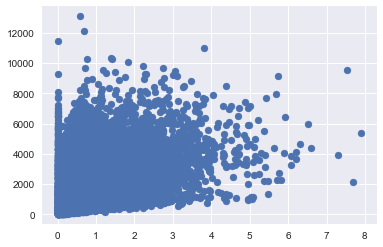

In [569]:
x = dataset['Item_Occupancy']
y = dataset['Item_Outlet_Sales']
plt.scatter(x,y)
plt.show()

In [570]:
#g = sns.FacetGrid(dataset,row='Outlet_Type',col = 'Item_Type',size=8.8,aspect=1.6)
#g.map(sns.barplot,'Item_Occupancy',alpha=0.5,ci=None)
#plt.show()

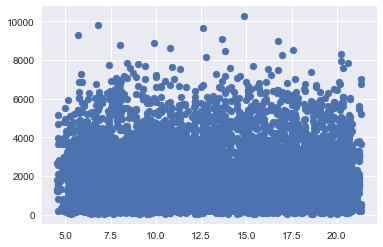

In [571]:
x = dataset['Item_Weight']
y = dataset['Item_Outlet_Sales']
plt.scatter(x,y)
plt.show()

In [572]:
dataset['Item_Type'].unique()

array(['Dairy n Frozen food', 'Drinks', 'Meat n Seafood',
       'Fruits and Vegetables', 'Health n Household', 'Baking and others',
       'Snacks', 'Bread n Breakfast', 'Others'], dtype=object)

In [573]:
item_mapping = {"Bread n Breakfast":1, "Meat n Seafood":2, "Dairy n Frozen food":3, "Drinks":4,\
                "Snacks":5,"Health n Household":6,"Baking and others":7,"Fruits and Vegetables":8,"Others":9}

In [574]:
dataset['Item_Type'] = dataset['Item_Type'].map(item_mapping)

In [575]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Items_Sold,Item_Occupancy,Visibility_Percent
0,FDA15,9.30,LowFat,0.016047,3,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,0.224662,1.604730
1,DRC01,5.92,REGULAR,0.019278,4,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,0.173504,1.927822
2,FDN15,17.50,LowFat,0.016760,2,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,0.234641,1.676007
3,FDX07,19.20,REGULAR,0.000000,8,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,4,0.000000,0.000000
4,NCD19,8.93,LowFat,0.000000,6,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18,0.000000,0.000000


In [576]:
dataset['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [577]:
outlet_mapping = {"Supermarket Type1":2,"Supermarket Type2":2,"Grocery Store":4,"Supermarket Type3":1}
dataset['Outlet_Type'] = dataset['Outlet_Type'].map(outlet_mapping)

In [578]:
dataset['Outlet_Age'] = 2013 - dataset['Outlet_Establishment_Year']

In [579]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Items_Sold,Item_Occupancy,Visibility_Percent,Outlet_Age
0,FDA15,9.30,LowFat,0.016047,3,249.8092,OUT049,1999,Medium,Tier 1,2,3735.1380,14,0.224662,1.604730,14
1,DRC01,5.92,REGULAR,0.019278,4,48.2692,OUT018,2009,Medium,Tier 3,2,443.4228,9,0.173504,1.927822,4
2,FDN15,17.50,LowFat,0.016760,2,141.6180,OUT049,1999,Medium,Tier 1,2,2097.2700,14,0.234641,1.676007,14
3,FDX07,19.20,REGULAR,0.000000,8,182.0950,OUT010,1998,NaN,Tier 3,4,732.3800,4,0.000000,0.000000,15
4,NCD19,8.93,LowFat,0.000000,6,53.8614,OUT013,1987,High,Tier 3,2,994.7052,18,0.000000,0.000000,26


In [580]:
dataset[['Item_Type','Outlet_Type','Outlet_Age']].groupby(['Item_Type','Outlet_Type'],as_index=False).mean()

,Item_Type,Outlet_Type,Outlet_Age
0,1,1,28.000000
1,1,2,12.284644
2,1,4,21.500000
3,2,1,28.000000
4,2,2,12.097143
5,2,4,21.500000
6,3,1,28.000000
7,3,2,12.383319
8,3,4,21.533333
9,4,1,28.000000


In [581]:
dataset[['Item_Type','Item_Outlet_Sales','Outlet_Type','Outlet_Age']].groupby(['Item_Type','Outlet_Type'],as_index=False).mean()

,Item_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,1,1,3832.170424,28.000000
1,1,2,2262.682649,12.284644
2,1,4,393.244527,21.500000
3,2,1,3731.713886,28.000000
4,2,2,2295.642257,12.097143
5,2,4,366.592984,21.500000
6,3,1,3708.907187,28.000000
7,3,2,2278.931875,12.383319
8,3,4,331.524013,21.533333
9,4,1,3335.001991,28.000000


In [582]:
dataset[['Item_Type','Item_Outlet_Sales','Outlet_Location_Type']].groupby(['Item_Type','Outlet_Location_Type'],as_index=False).mean()

,Item_Type,Outlet_Location_Type,Item_Outlet_Sales
0,1,Tier 1,1878.854310
1,1,Tier 2,2314.533167
2,1,Tier 3,2270.102497
3,2,Tier 1,1772.509639
4,2,Tier 2,2346.546426
5,2,Tier 3,2348.975690
6,3,Tier 1,1857.759059
7,3,Tier 2,2343.869895
8,3,Tier 3,2283.933237
9,4,Tier 1,1697.053131


In [583]:
dataset[['Item_Type','Item_Occupancy','Item_Weight']].groupby(['Item_Type'],as_index=False).mean()

,Item_Type,Item_Occupancy,Item_Weight
0,1,0.976246,11.778652
1,2,0.918808,12.782577
2,3,0.916289,13.113477
3,4,0.887139,11.700557
4,5,0.952375,12.747086
5,6,0.799429,13.297065
6,7,0.942181,12.553041
7,8,0.956055,13.224769
8,9,0.813844,13.853285


In [584]:
dataset[['Item_Type','Item_Outlet_Sales','Item_Fat_Content']].groupby(['Item_Type','Item_Fat_Content'],as_index=False).mean()

,Item_Type,Item_Fat_Content,Item_Outlet_Sales
0,1,LowFat,2238.246713
1,1,REGULAR,2113.408252
2,2,LowFat,2012.768079
3,2,REGULAR,2304.222833
4,3,LowFat,2130.845343
5,3,REGULAR,2236.947884
6,4,LowFat,2073.218541
7,4,REGULAR,1854.065451
8,5,LowFat,2344.879924
9,5,REGULAR,2150.338992


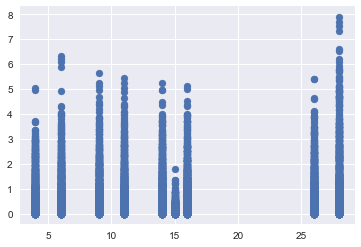

In [585]:
x = dataset['Outlet_Age']
y = dataset['Item_Occupancy']
plt.scatter(x,y)
plt.show()

In [586]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 16 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int64
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
Items_Sold                   8523 non-null int32
Item_Occupancy               8523 non-null float64
Visibility_Percent           8523 non-null float64
Outlet_Age                   8523 non-null int64
dtypes: float64(6), int32(1), int64(4), object(5)
memory usage: 1.0+ MB


In [595]:
cols = ['Item_Type','Item_Occupancy','Outlet_Type']
#cols = ['Item_Type','Item_Occupancy']
y = dataset['Item_Outlet_Sales']
X = dataset[cols]


In [588]:
cols1 = ['Item_Occupancy','Item_Outlet_Sales','Outlet_Type']
heat_dataset = dataset[cols1]

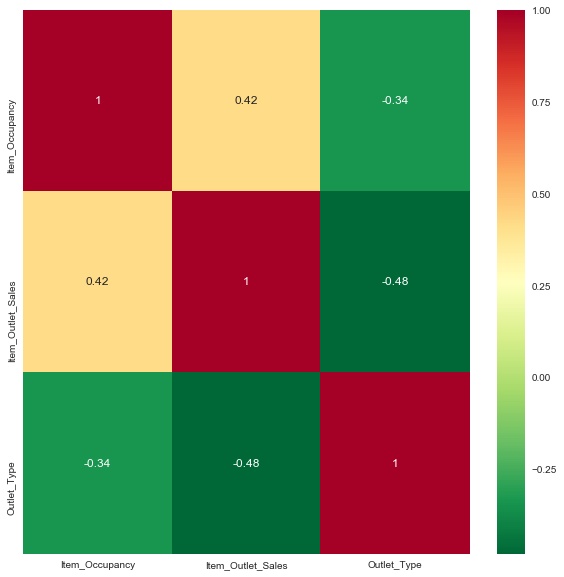

In [589]:
corrmat = heat_dataset.corr()
plt.figure()
plt.subplots(figsize=(10,10))
sns.set(font_scale=1)
sns.heatmap(corrmat,cmap='RdYlGn_r',annot=True)#yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [590]:
X.head()

,Item_Type,Item_Occupancy,Outlet_Type
0,3,0.224662,2
1,4,0.173504,2
2,2,0.234641,2
3,8,0.000000,4
4,6,0.000000,2


In [596]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.27,random_state=0)

In [597]:
from sklearn import linear_model
from sklearn.metrics import r2_score

clf = linear_model.LinearRegression()
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
print(np.mean(predictions - y_test) ** 2)

print('Variance score: %.2f' % clf.score(X_test, y_test))

2815.1376684276493
Variance score: 0.18


In [593]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(y_test,predictions))
#rmse = np.sqrt(mean_squared_error(y_test,predictions))
rmse

1456.8430839673485

In [594]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,predictions)

0.30887550404213382